In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [122]:
df=pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [123]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [124]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [125]:
df.shape

(5572, 5)

In [126]:
df.size

27860

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [128]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [129]:
df.drop(columns=['Unnamed: 2'],inplace=True)

In [130]:
df.drop(columns=['Unnamed: 3','Unnamed: 4'],inplace=True)

In [131]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [132]:
df=df.rename(columns={'v1':'TARGET','v2':'MESSAGE'})

In [133]:
df.isnull().sum()

TARGET     0
MESSAGE    0
dtype: int64

In [134]:
df.duplicated().sum()

403

In [135]:
df.drop_duplicates(keep='first',inplace=True)

In [136]:
df.duplicated().sum()

0

In [137]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['TARGET']=encoder.fit_transform(df['TARGET'])
df['TARGET']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: TARGET, Length: 5169, dtype: int32

In [138]:
df.head()

,TARGET,MESSAGE
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


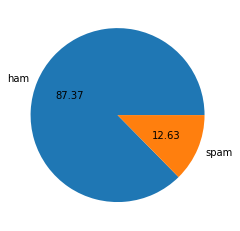

In [139]:
plt.pie(df["TARGET"].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [140]:
x=df['MESSAGE']
y=df['TARGET']

In [141]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: MESSAGE, Length: 5169, dtype: object

In [144]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: TARGET, Length: 5169, dtype: int32

In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)


In [38]:
print(x_train_cv)

  (0, 8)	2
  (0, 52)	1
  (0, 34)	1
  (0, 51)	1
  (0, 46)	1
  (0, 50)	1
  (0, 1)	1
  (0, 9)	1
  (0, 42)	1
  (1, 52)	1
  (1, 45)	1
  (1, 40)	1
  (1, 44)	2
  (1, 38)	1
  (1, 30)	1
  (1, 19)	1
  (2, 9)	1
  (2, 42)	1
  (2, 49)	1
  (2, 16)	1
  (2, 22)	1
  (2, 41)	2
  (2, 24)	1
  (2, 12)	1
  (2, 17)	1
  :	:
  (4, 18)	1
  (4, 39)	1
  (4, 23)	1
  (5, 52)	1
  (5, 9)	1
  (5, 42)	1
  (5, 2)	1
  (5, 18)	1
  (5, 27)	1
  (5, 47)	1
  (5, 48)	1
  (5, 28)	1
  (6, 20)	1
  (6, 26)	1
  (6, 43)	1
  (6, 4)	1
  (6, 0)	1
  (6, 3)	1
  (7, 26)	2
  (7, 4)	1
  (7, 37)	1
  (7, 11)	1
  (7, 15)	1
  (7, 29)	1
  (7, 33)	1


In [146]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm


In [147]:
cv=CountVectorizer()

In [148]:
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.fit_transform(x_test)

In [106]:
print(x_train_cv)

  (0, 1879)	1
  (0, 1170)	1
  (0, 6840)	1
  (0, 6610)	1
  (0, 2779)	1
  (1, 1939)	1
  (1, 4467)	1
  (1, 453)	1
  (1, 7176)	1
  (1, 7594)	1
  (1, 1577)	1
  (1, 203)	1
  (1, 4768)	1
  (1, 7175)	1
  (1, 7390)	1
  (1, 7590)	1
  (1, 4309)	1
  (1, 5157)	1
  (1, 3732)	1
  (1, 3015)	1
  (1, 2333)	1
  (1, 5210)	1
  (1, 4577)	1
  (1, 4731)	1
  (1, 5615)	1
  :	:
  (4134, 3290)	2
  (4134, 4817)	1
  (4134, 1546)	1
  (4134, 4195)	1
  (4134, 891)	1
  (4134, 1092)	1
  (4134, 1261)	1
  (4134, 7302)	1
  (4134, 6595)	1
  (4134, 1624)	1
  (4134, 1977)	1
  (4134, 7438)	1
  (4134, 6189)	1
  (4134, 6815)	1
  (4134, 2357)	1
  (4134, 4093)	1
  (4134, 6583)	1
  (4134, 5934)	1
  (4134, 1661)	1
  (4134, 5153)	1
  (4134, 6292)	1
  (4134, 3707)	1
  (4134, 6172)	1
  (4134, 3624)	1
  (4134, 4785)	1


In [149]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [150]:
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)

In [151]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,prediction_train)*100)

99.75816203143893


In [152]:
lr.fit(x_test_cv,y_test)
prediction_test=lr.predict(x_test_cv)

In [153]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction_test)*100)

99.80657640232108
